# Quantitative Analysis for Lady Bug House 

## Creating Visuals of Quantitative Questions in the Caregiver Survey 

### By Patrick L. Cavins

### Summary 

In this caregiver survey several questions where identified to be truely quantitative in nature. Here is an analysis of those questions.



In [57]:
## Libraries

import pandas as pd
import seaborn as sns 
import numpy as np
# import plotly.plotly as py
# import plotly.graph_objs as go
# import cufflinks as cf
import os
# import plotly.io as pio
import matplotlib.pyplot as plt 
import matplotlib

In [58]:
## import the survey data from ./Data 
df = pd.read_csv('./Data/lbh_data_python2.csv')

In [59]:
## This is the list of questions which can be used to generate titles 
## for the graphs/tables I am making 
list_questions = df.iloc[0]

In [60]:
list_questions[0]

'Are you currently caring, or have you ever cared in the past for a child or adolescent with a life-limiting illness? For this study the term "life-limiting illness" is defined as any diagnosis or illness that has the potential to dramatically reduce years of life lived, or dramatically impact quality of life.'

In [61]:
## Drop the questions from the data to built out the tables 
survey_data = df.drop([0,1])

In [62]:
survey_data.shape

(235, 140)

In [63]:
survey_data.head()

,Q149,Q137,Q18,Q16,Q17,Q134,Q19,Q20,Q20.1,Q20_1,...,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139
2,"Yes, in the past",Yes,Yes,Mother,NaN,Yes,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Yes, currently",Yes,Yes,Mother,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Yes, in the past",Yes,Yes,Professional/hired caregiver,NaN,NaN,Yes,We moved from another state,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Yes, in the past",Yes,Yes,Family member other than parent,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Yes, currently",Yes,Yes,Professional/hired caregiver,NaN,NaN,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
## This fucntion takes in a question number, header format, and a dataframe 

def survey_quant (num, df):
    # We are going to get categorical option, values, and the normalized values
    # for each question:
    
    #Catergories refers to all responses recorded in the survey 
    categories = df[num].value_counts().keys().to_list()
    
    #Values is the number of counts for each response 
    values = df[num].value_counts().to_list()
    
    #Values_normalized is the 
    values_normalized = df[num].value_counts(normalize=True).to_list()
    
    # returns the 3 new variables
    return categories, values, values_normalized

In [65]:
records = survey_quant('Q149', survey_data)

In [66]:
records

(['Yes, in the past', 'Yes, currently'],
 [100, 85],
 [0.5405405405405406, 0.4594594594594595])

In [67]:
records[0]

['Yes, in the past', 'Yes, currently']

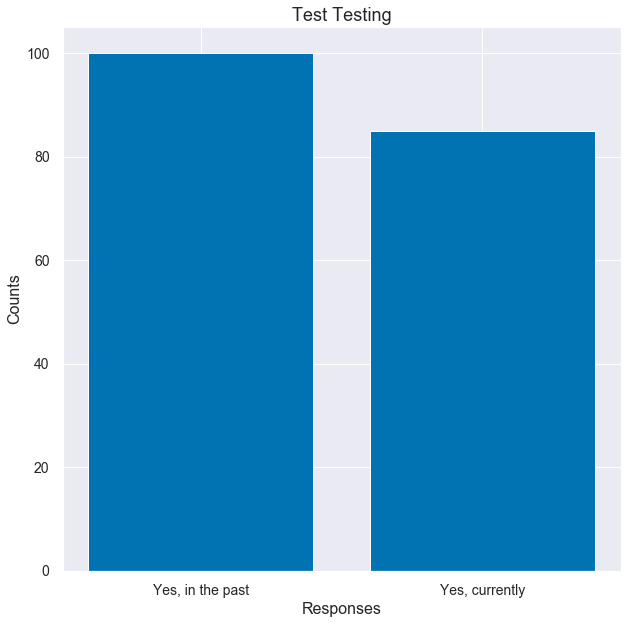

In [68]:
#Using MatplotLib to make a Bar Chart 

plt.figure(figsize=(10, 10))
plt.bar(records[0], records[1])
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Responses', fontsize=16)
plt.tick_params(labelsize=14)
plt.title("Test Testing", fontsize=18);

### Creating a dataframe to hold the information for the Table Subplot 

In [69]:
df = pd.DataFrame(columns= ('Value, Counts', 'Value, Normalized'), index=records[0])
df['Value, Counts'] = records[1]
df['Value, Normalized'] = records[2]

## Builing a Matplotlib plot which has a graph and a table included

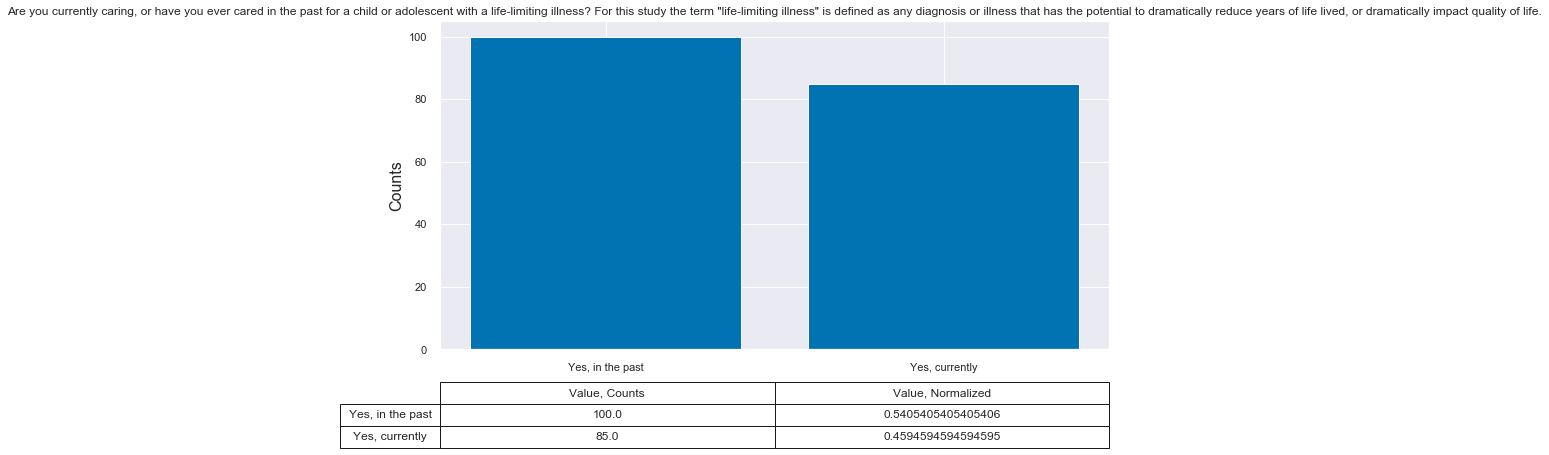

In [70]:
##Matplotlib to create a graph and table 

# Set Styles 
plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.style.use(['seaborn'])
sns.set(palette='colorblind')

#Set Size
fig = plt.figure(figsize=(12, 12))



#Title
plt.title(f'{list_questions[0]}', )


#Add a Bar Chart
plt.bar(records[0], records[1])
plt.ylabel('Counts', fontsize=16);

# Add a Table
plt.table(cellText=df.values,
    rowLabels=df.index,
    colLabels=df.columns,
    cellLoc = 'center', 
    rowLoc = 'center',
    loc='bottom',
    bbox=[0, -0.3, 1, 0.2] 
         )

fig.subplots_adjust(bottom=0.5)

plt.savefig('./quant_images/test.pdf')
plt.show()


# https://stackoverflow.com/questions/35779047/matplotlib-table-plotting-layout-control
# https://stackoverflow.com/questions/54138482/matplotlib-bar-plot-with-table-formatting


## Making Graphs, Many at a Time 

### What is being saved


records 

In [71]:
## Update the function to map the responses into the dataframe

## This fucntion takes in a question number, header format, and a dataframe

## This might not actually be needed, still evaluating (06/21/2019)

def survey_quant2 (num, df):
    # We are going to get categorical option, values, and the normalized values
    # for each question:
    
    #Catergories refers to all responses recorded in the survey 
    categories = df[num].value_counts().keys().to_list()
    
    #Values is the number of counts for each response 
    values = df[num].value_counts().to_list()
    
    #Values_normalized is the 
    values_normalized = df[num].value_counts(normalize=True).to_list()
    
    #just variable used to built the dataframe 
    records = categories, values, values_normalized
    
    #This is the dataframe used for building the tables 
    new_df = pd.DataFrame(columns= ('Value, Counts', 'Value, Normalized'), index=records[0])
    new_df['Value, Counts'] = records[1]
    new_df['Value, Normalized'] = records[2]
    
    # returns the 4 new variables
    return categories, values, values_normalized, new_df

In [72]:
records = survey_quant2('Q149', survey_data)

In [73]:
records[0]

['Yes, in the past', 'Yes, currently']

In [74]:
records[1]

[100, 85]

In [76]:
#Use a for loop to go through the questions 

for column, question in zip(survey_data.columns, list_questions):
    print (column)
#     print (question)
    
    if len(survey_data[column]) == survey_data[column].isnull().sum():
        print ("nope")
    
    else:
    
        records = survey_quant(column, survey_data)

        #Creating the df needed for the table 
        df = pd.DataFrame(columns= ('Value, Counts', 'Value, Normalized'), index=records[0])
        df['Value, Counts'] = records[1]
        df['Value, Normalized'] = records[2]

        ## Matplotlib to create a graph and table 

        # Set Styles 
        plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
        plt.style.use(['seaborn'])
        sns.set(palette='colorblind')

        #Set Size
        fig = plt.figure(figsize=(12, 12))

        #Title
        plt.title(f'{question}',)

        #Add a Bar Chart
        plt.bar(records[0], records[1])
        plt.ylabel('Counts', fontsize=16)

        # Add a Table
        plt.table(cellText=df.values,
            rowLabels=df.index,
            colLabels=df.columns,
            cellLoc = 'center', 
            rowLoc = 'center',
            loc='bottom',
            bbox=[0, -0.3, 1, 0.2] 
                 )

        fig.subplots_adjust(bottom=0.5)

        #Show my work! 
#         plt.show()

        #Save my work!
        plt.savefig(f'./quant_images/{column}.pdf')
        plt.close()

Q149
Q137
Q18
Q16
Q17
Q134
Q19
Q20
Q20.1
Q20_1
Q21
Q21_1
Q22
Q23
Unnamed: 14
Q24
Q25
Q26
Q27
Q29
nope
Q28
Q33
Q75
Q31
Q32
nope
Q34
Q35_1
Q36
Q37
Q38
Q39
Q40
Q41
Q42
Q43
C43
Q44
Q46
Q47
Q48
Q49
Q50
Q51
Q135
Q52
Q141
Q140
Q139
Q53
Q54
Q55
Q56
Q58
Q59
Q60
Q61
Q62
Q63
Q64
Q65
Q66
Q67
Q68
Q69
Q70
Q71
Q72
Q73
Q74
Q76
Q78
Q77
Q79
Q80
Q81
Q82
Q84
Q85
Q83
Q87
Q88
Q90
Q91
Q89
Q92
Q93
Q94
Q95
Q96
Q97
Q98
Q99
Q100
Q101
Q102
Q103
Q104
Q105
Q106
Q107
Q108
Q109
Q110
Q111
Q112
Q113
Q114
Q115
Q116
Q117
Q119
Q118
Q120
Q121
Q122
Q123
Q124
Q125
Q126
Q127
Q128
Q129
Q132
Q133
Q130
Q136
Q134.1
Q120 - Topics
Unnamed: 128
nope
Unnamed: 129
nope
Unnamed: 130
nope
Unnamed: 131
nope
Unnamed: 132
nope
Unnamed: 133
nope
Unnamed: 134
nope
Unnamed: 135
nope
Unnamed: 136
nope
Unnamed: 137
nope
Unnamed: 138
nope
Unnamed: 139
nope


## Part II, Question Editing

After making the graphs initialy they were reviewed, and some graphs we then produced manually as a 1-off. Some questions also required manual editing. Also changes to questions and/or responses are noted in this section.

### For Question 119 

Original Reponse:
We sacrificed by being on a single income.  We were week to week, I paid one bill one month another bill the next month.  We had to have a stash of $$ in case we had to go to the hospital which was nearly two hours away.  

Updated Response:
We sacrificed by being on a single income.  We were week to week, I paid one bill one month another bill the next month.  We had to have a stash of money in case we had to go to the hospital which was nearly two hours away.  

### For Question 21 

Question - 

In [ ]:
# # Set styles
# plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
# plt.style.use(['seaborn'])
# sns.set(palette='colorblind')

# colors = sns.color_palette(palette='colorblind')
# columns = ('Responses', 'Value, Counts', 'Value, Normalized')



# #Making Bar Chart
# plt.figure(figsize=(10, 10))
# plt.bar(records[0], records[1])
# plt.ylabel('Counts', fontsize=16)
# # plt.xlabel('Responses', fontsize=16)
# plt.tick_params(labelsize=14)
# plt.title("Test Testing", fontsize=18)



In [ ]:
# # Set styles
# plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
# plt.style.use(['seaborn'])
# sns.set(palette='colorblind')
# # matplotlib.rc("font", family="Times New Roman", size=12)

# labels = ['n=1','n=2','n=3','n=4','n=5']
# a = [98.8,98.8,98.8,98.8,98.8]
# b = [98.6,97.8,97.0,96.2,95.4]
# bar_width = 0.20
# data = [a,b]

# colors = sns.color_palette(palette='colorblind')
# columns = ('n=1', 'n=2', 'n=3', 'n=4', 'n=5')

# index = np.arange(len(labels))
# fig = plt.figure(figsize=(12,9))
# plt.bar(index, a, bar_width)
# plt.bar(index+bar_width+.02, b, bar_width)
# plt.table(cellText=data,
#           rowLabels=[' a ', ' b '],
#           rowColours=colors,
#           colLabels=columns,
# #           loc='bottom',
#           bbox=[0, 0.1, 1, 0.2])

# fig.subplots_adjust(bottom=0.1)

# plt.ylabel('Some y label which effect the bottom padding!')
# plt.xticks([])
# plt.title('Some')
# plt.show()


# # https://stackoverflow.com/questions/54138482/matplotlib-bar-plot-with-table-formatting

In [ ]:
data

In [ ]:
records[1]

In [ ]:
records[2]

In [ ]:
data

## Generating the Table for a Single Question 

In [ ]:
# ## This fucntion takes in a question number, header format, and a dataframe 

# def survey_quant (num, df):
#     # We are going to get categorical option, values, and the normalized values
#     # for each question:
    
#     #Catergories refers to all responses recorded in the survey 
#     categories = df[num].value_counts().keys().to_list()
    
#     #Values is the number of counts for each response 
#     values = df[num].value_counts().to_list()
    
#     #Values_normalized is the 
#     values_normalized = df[num].value_counts(normalize=True).to_list()
    
#     # returns the 3 new variables
#     return categories, values, values_normalized

In [ ]:
records = survey_quant('Q149', survey_data)

In [ ]:
records[0]

In [ ]:
records[1]

In [ ]:
records[2]

In [ ]:
table_values = [[records[0]],
                [records[1]],
                [records[2]]]

In [ ]:
# ## Making a Table in Plot.ly

# #This is defining the structure of the tables 
# table_trace = go.Table(
#     header=dict(
#         values=['Responses', 'Values, Raw', 'Values, Normalized']),
#     cells=dict(
#         values= table_values)
# )

# #Builing out the layout
# layout = go.Layout(
#      = "Does this work?",
    
# )


# # This is the figure structure 
# fig = go.Figure(data=[table_trace], layout=layout)



# #Generates the plot
# py.iplot(data, filename = 'test')


In [ ]:
# trace0 = go.Table(
#   columnwidth = [400,800],
#   header = dict(
#     values = [['Responses'],
#                   ['Values, Raw'],['Values, Percentage']],
#     line = dict(color = '#506784'),
#     fill = dict(color = '#119DFF'),
#     align = ['left','center'],
#     font = dict(color = 'white', size = 12),
#     height = 40
#   ),
    
#     cells = dict(
#     values = table_values,
#     line = dict(color = '#506784'),
#     fill = dict(color = ['#25FEFD', 'white']),
#     align = ['left', 'center'],
#     font = dict(color = '#506784', size = 12),
#     height = 30
#     ))

# layout = go.Layout(
#     title= go.layout.Title(
#         text=f'{list_questions[]}',
        
# #         xref='paper',
#         x=0))

In [ ]:
# data = [trace0]
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename = 'q75')

In [ ]:
# pio.write_image(fig, './quant_images/test.png')

## Generating Tables for Every Question in the Survey 

In [ ]:
# for column, question in zip(survey_data.columns, list_questions):
#     print (column)
#     print (question)
    
#     records = survey_quant(column, survey_data)
#     table_values  = [[records[0]],
#                      [records[1]],
#                      [records[2]]]
    
#     trace0 = go.Table(
#       columnwidth = [400,800],
#       header = dict(
#         values = [['Responses'],
#                       ['Values, Raw'],['Values, Percentage']],
#         line = dict(color = '#506784'),
#         fill = dict(color = '#119DFF'),
#         align = ['left','center'],
#         font = dict(color = 'white', size = 12),
#         height = 40
#       ),

#         cells = dict(
#         values = table_values,
#         line = dict(color = '#506784'),
#         fill = dict(color = ['#25FEFD', 'white']),
#         align = ['left', 'center'],
#         font = dict(color = '#506784', size = 12),
#         height = 30
#         ))

#     layout = go.Layout(
#         title= go.layout.Title(
#             text=f'{question}',
#     #         xref='paper',
#             x=0))
    
#     data = [trace0]
#     fig = go.Figure(data=data, layout=layout)
    
#     pio.write_image(fig, f'./quant_images/{column}.png')